In [1]:
import sys
sys.path.append(".")
from models_from_scratch import LinearRegression, PCA
from helper import PrepareData

In [2]:
import numpy as np
import pandas as pd
import phik
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')

In [52]:
df = pd.read_csv("parkinsons_updrs.csv")

Text(0.5, 1.0, "Pearson's Correlation plot")

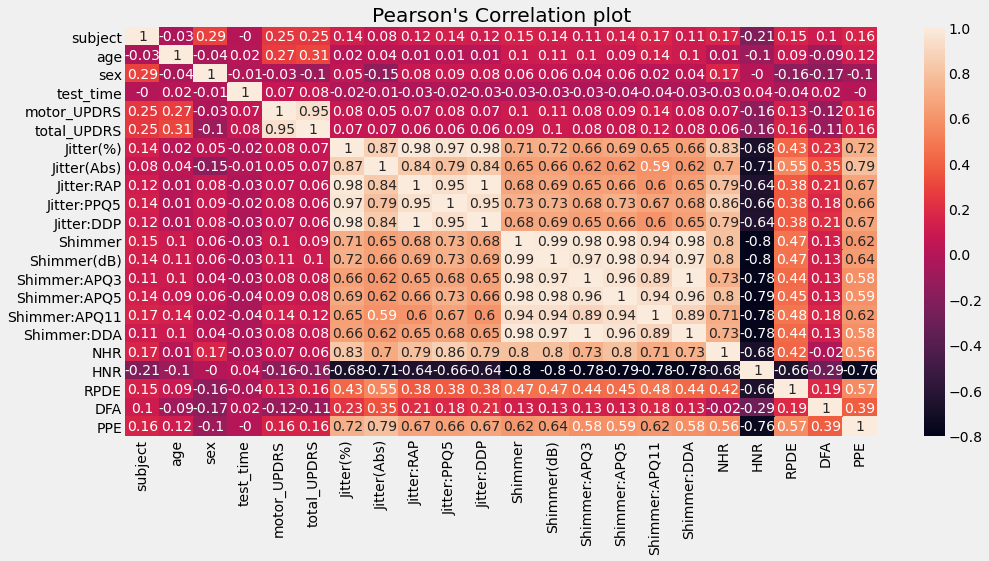

In [24]:
plt.figure(figsize=(15, 7))
sns.heatmap(round(df.corr(), 2), annot=True, )
plt.title("Pearson's Correlation plot")

In [25]:
len(df.columns)

22

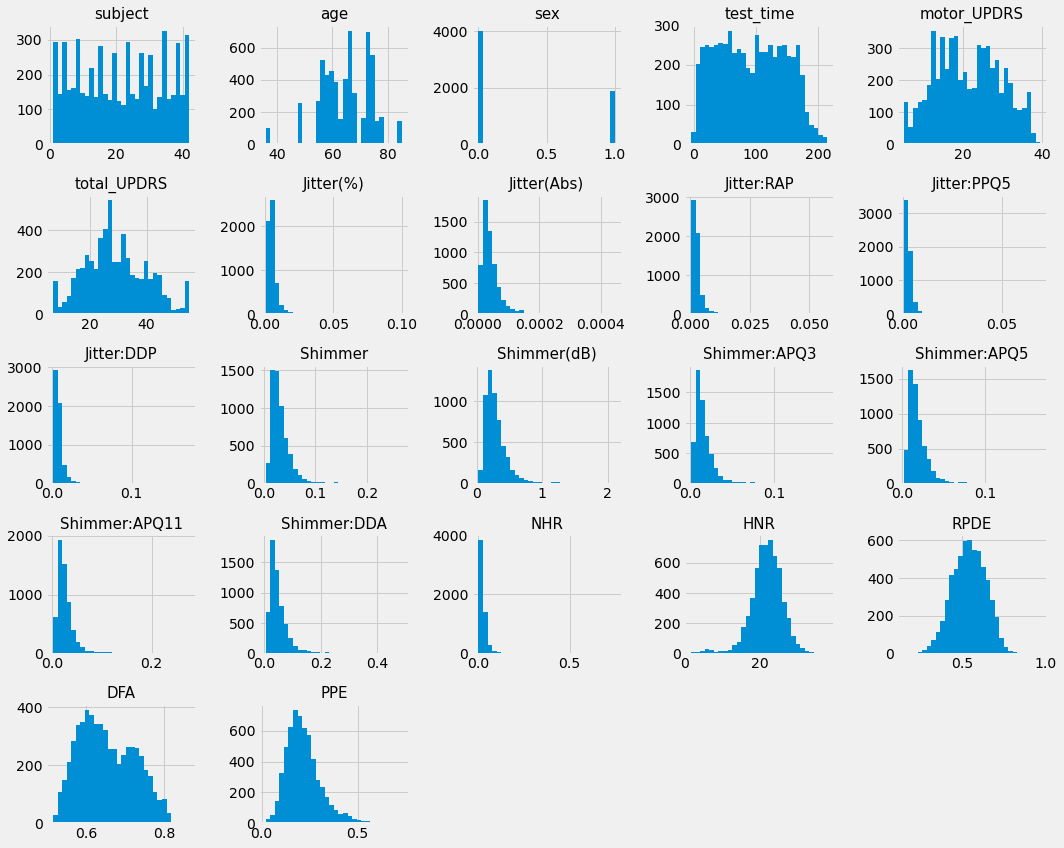

In [26]:
fig = df.hist(bins = 30, figsize=(15, 12))
[x.title.set_size(15) for x in fig.ravel()]
plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['subject', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

interval columns not set, guessing: ['subject', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


<AxesSubplot:>

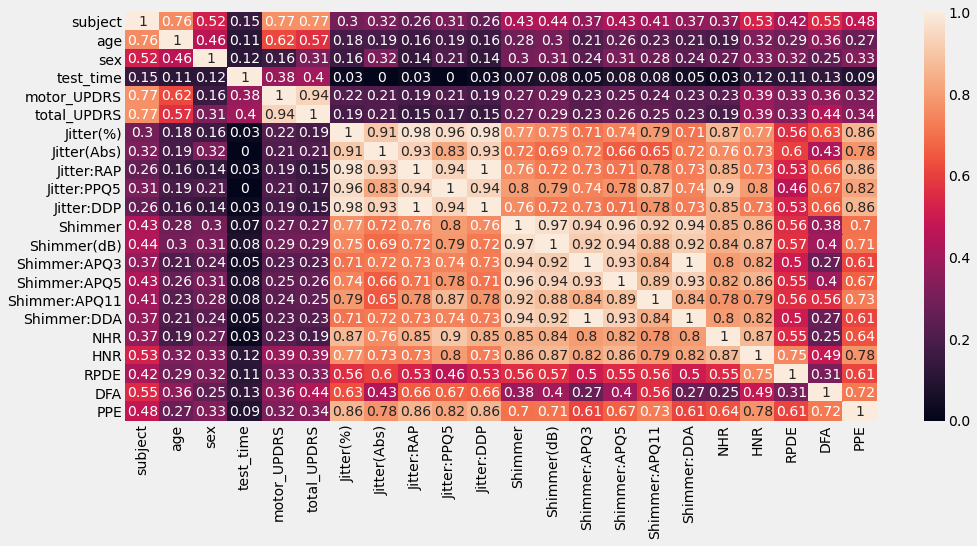

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.phik_matrix(), 2), annot=True)

# Modeling

In [3]:
df = PrepareData(
    filename=
    "C:\\Users\\abhil\\Documents\\ML_IE7374\\Project\\parkinsons_updrs.csv",
    drop_columns=['total_UPDRS'],
    target='motor_UPDRS',
    test_size=0.3)

In [4]:
X_train, y_train, X_test, y_test = df.transform()

In [5]:
X_train

array([[ 1.        ,  1.48775145,  2.28839911, ...,  0.42605003,
        -0.16682833, -0.45357048],
       [ 1.        ,  0.84306046, -3.25541977, ..., -0.66500924,
        -1.74652892, -1.15706634],
       [ 1.        , -0.20456239, -1.10577571, ...,  0.36515416,
         1.28125414,  1.77552537],
       ...,
       [ 1.        , -1.41335799,  1.04386834, ...,  0.95166185,
         0.28350381, -0.74579685],
       [ 1.        , -1.01042613,  0.36503338, ...,  0.41114892,
         1.542226  ,  1.31544277],
       [ 1.        ,  0.76247409,  1.1570075 , ...,  0.9908021 ,
         1.28748123,  1.22401331]])

In [6]:
ols_model = LinearRegression(learning_rate=0.0007,
                             lambda_value = 0.2,
                             regularization = True,
                             tolerance=0.0001,
                             max_iter=1000,
                             method='ols',
                             set_seed=7)
ols_model.fit(X_train, y_train)
ols_model.score(X_test, y_test)

Matrix is full rank
Data is not low rank
Solving using closed form solution/ Ordinary Least Squares method with l2 Regularization
RMSE: 7.211072386101172
SSE: 213822.21110561356
Metrics with l2 Regularization:
RMSE test data: 7.143711358886751 
 SSE test data: 89970.49491913142


Matrix is full rank
Data is not low rank
Solving using Batch Gradient Descent with l2 Regularization


  0%|          | 0/1000 [00:00<?, ?it/s]

RMSE: 7.212397907471334
SSE: 213900.82686326554
Metrics with l2 Regularization:
RMSE test data: 7.141591923880413 
 SSE test data: 89917.11697035344


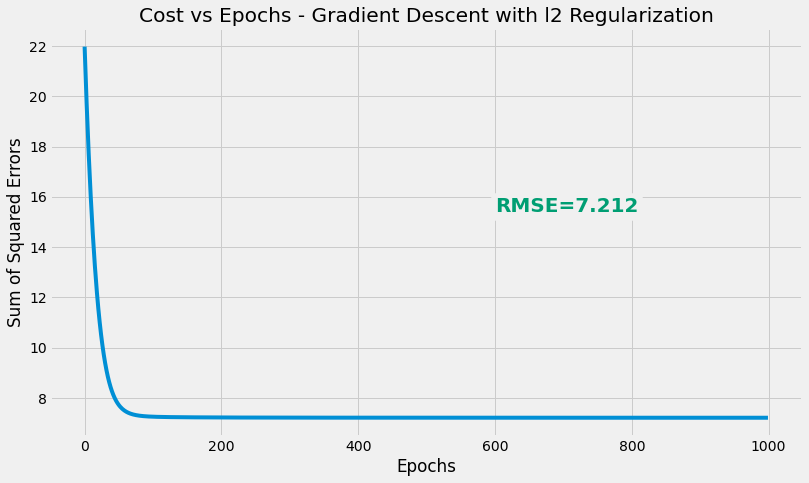

In [7]:
bgd_model = LinearRegression(learning_rate=0.00001,
                             lambda_value = 0.2,
                             regularization = True,
                             tolerance=0.0,
                             max_iter=1000,
                             method='gd',
                             set_seed=7)
bgd_model.fit(X_train, y_train)
bgd_model.score(X_test, y_test)

Matrix is full rank
Data is not low rank
Solving using Stochastic Gradient Descent with l2 Regularization


  0%|          | 0/1000 [00:00<?, ?it/s]

RMSE: 7.213769304070122
SSE: 213982.1786574799
Metrics with l2 Regularization:
RMSE test data: 7.140699475165745 
 SSE test data: 89894.64539753682


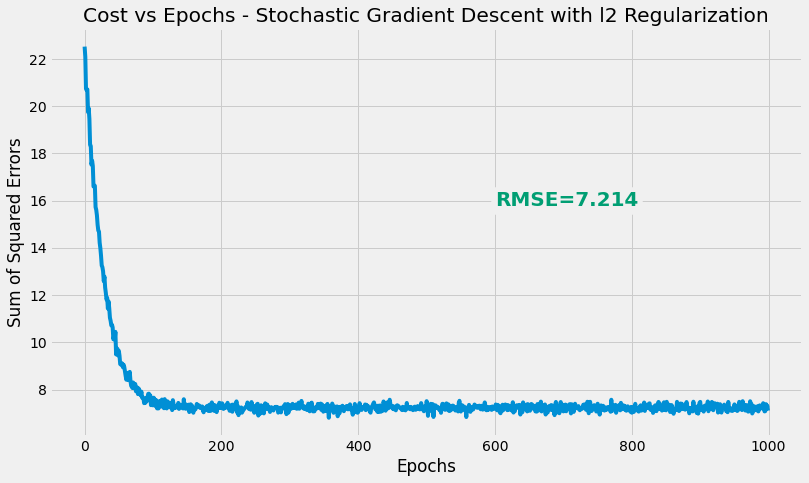

In [8]:
sgd_model = LinearRegression(learning_rate=0.00003,
                             lambda_value = 0.1,
                             regularization = True,
                             tolerance=0,
                             max_iter=1000,
                             method='sgd')

sgd_model.fit(X_train, y_train)
sgd_model.score(X_test, y_test)

# Dimensionality reduction

In [36]:
pca = PCA(n_components=2)

In [37]:
pca.fit(X_train[:,1:])

In [38]:
X_train_pca = pca.transform(X_train[:,1:])

In [39]:
X_train_pca

array([[ 0.58797637, -1.70409519],
       [-3.1405284 , -0.43301878],
       [ 2.50553402,  3.31163457],
       ...,
       [-0.04894854, -1.31725741],
       [ 1.4917508 ,  1.58106917],
       [ 2.14774209,  0.19519648]])

<AxesSubplot:>

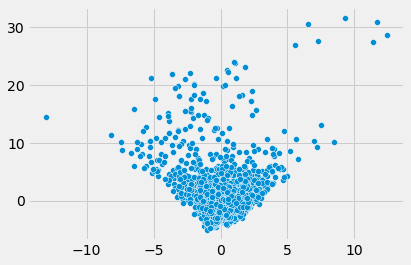

In [75]:
sns.scatterplot(x = X_train_pca[:, 1], y = X_train_pca[:, 0])

In [40]:
X_train_pca_intercept = np.insert(X_train_pca, 1, np.ones(X_train_pca.shape[0]), axis=1)

In [41]:
pca.explained_variance

[56.50808357347049, 8.680933047272113]

In [42]:
X_train.shape

(4112, 21)

In [43]:
X_train_pca.shape

(4112, 2)

In [44]:
ols_model = LinearRegression(learning_rate=0.0007,
                             lambda_value = 0.2,
                             regularization = True,
                             tolerance=0.0001,
                             max_iter=1000,
                             method='ols',
                             set_seed=7)
ols_model.fit(X_train_pca_intercept, y_train)

Matrix is full rank
Data is not low rank
Solving using closed form solution/ Ordinary Least Squares method with l2 Regularization
RMSE: 8.06401305935395
SSE: 267396.3968273245


Matrix is full rank
Data is not low rank
Solving using Stochastic Gradient Descent with l2 Regularization


  0%|          | 0/1000 [00:00<?, ?it/s]

RMSE: 8.0650733805496
SSE: 267466.72030156787


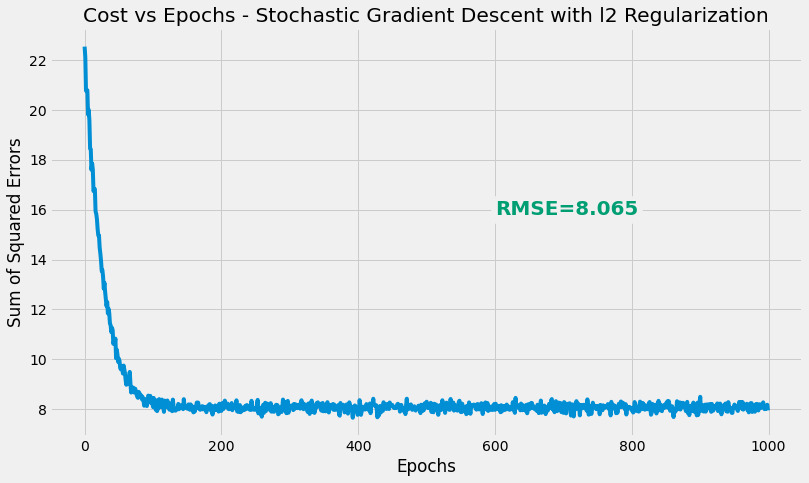

In [45]:
sgd_model = LinearRegression(learning_rate=0.00003,
                             lambda_value = 0.1,
                             regularization = True,
                             tolerance=0,
                             max_iter=1000,
                             method='sgd')

sgd_model.fit(X_train_pca_intercept, y_train)

In [17]:
from sklearn.decomposition import PCA
from sklearn.linear_model import *
from sklearn.metrics import *

In [121]:
pca = PCA(n_components=10, svd_solver='full')
pca.fit(X)

PCA(n_components=10, svd_solver='full')

In [125]:
principal_components.shape

(10, 21)

In [126]:
pca.components_.shape

(10, 21)

In [127]:
pca.explained_variance_ratio_

array([0.56508084, 0.08680933, 0.07549526, 0.05861367, 0.05062424,
       0.04874193, 0.0363544 , 0.02769963, 0.01502041, 0.01005078])

In [8]:
pca = PCA(n_components=2)

In [9]:
pca.fit(X_train)

PCA(n_components=2)

In [10]:
X_pca = pca.transform(X_train)

In [14]:
test_pca = pca.transform(X_test)

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_pca, y_train)

LinearRegression()

In [15]:
lr.score(X_pca, y_train)

0.020364198462264338

In [18]:
lr.predict(X_pca)

array([22.3604291 , 20.65938376, 20.33135668, ..., 21.98292285,
       20.93226644, 21.82685248])

In [19]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, lr.predict(X_pca)))

Mean squared error: 65.03


In [47]:
lr.coef_

array([0.2816126 , 0.51220479])

In [49]:
ols_model.w

array([0.28161139, 0.51219044])

In [50]:
lr.predict(X_pca)

array([22.3604291 , 20.65938376, 20.33135668, ..., 21.98292285,
       20.93226644, 21.82685248])

In [60]:
lr.intercept_

21.322001823929963

In [51]:
ols_model.predict(X_train_pca)

array([ 1.03840211, -0.66262047, -0.99060066, ...,  0.66090219,
       -0.38971451,  0.50485086])

In [61]:
X_train_pca.dot(ols_model.w) + lr.intercept_

array([22.36040393, 20.65938135, 20.33140116, ..., 21.98290401,
       20.93228732, 21.82685268])

In [59]:
X_pca.shape

(4112, 2)

In [46]:
X_train_pca.shape

(4112, 2)